In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import re


In [129]:
# load hls_metrics.csv

df = pd.read_csv('hls_metrics.csv')

print(df.head())

                                       Run_ID  Dataflow  P  P_Suffix  \
0  final_result_dataflow_False_P_1_int8_1.prj     False  1         1   
1  final_result_dataflow_False_P_2_int8_1.prj     False  2         1   
2  final_result_dataflow_False_P_2_int8_2.prj     False  2         2   
3  final_result_dataflow_False_P_4_int8_2.prj     False  4         2   
4  final_result_dataflow_False_P_4_int8_4.prj     False  4         4   

   Latency_Cycles  Clock_Period_ns  Latency_ms  BRAM   DSP      FF     LUT  \
0        76247141            2.470  188.330438  3602   460   51082   48527   
1        46614629            2.707  126.185801  3616   726   80889   68587   
2        41896037            2.707  113.412572  3616   726   83977   83822   
3        26701925            2.494   66.594601  3765  1262  144614  122110   
4        24367205            2.494   60.771809  4341  1646  147808  138181   

    BRAM_Util   DSP_Util  
0   89.335317   5.097518  
1   89.682540   8.045213  
2   89.682540   8

                                        Run_ID  Dataflow   P  P_Suffix  \
0   final_result_dataflow_False_P_2_int8_1.prj     False   2         1   
1   final_result_dataflow_False_P_4_int8_2.prj     False   4         2   
2   final_result_dataflow_False_P_8_int8_4.prj     False   8         4   
3  final_result_dataflow_False_P_16_int8_8.prj     False  16         8   
4    final_result_dataflow_True_P_2_int8_1.prj      True   2         1   
5    final_result_dataflow_True_P_4_int8_2.prj      True   4         2   
6    final_result_dataflow_True_P_8_int8_4.prj      True   8         4   
7   final_result_dataflow_True_P_16_int8_8.prj      True  16         8   

   Latency_Cycles  Clock_Period_ns  Latency_ms  BRAM   DSP      FF     LUT  \
0        46614629            2.707  126.185801  3616   726   80889   68587   
1        26701925            2.494   66.594601  3765  1262  144614  122110   
2        17656421            2.603   45.959664  4125  2712  283516  250381   
3        13497701    

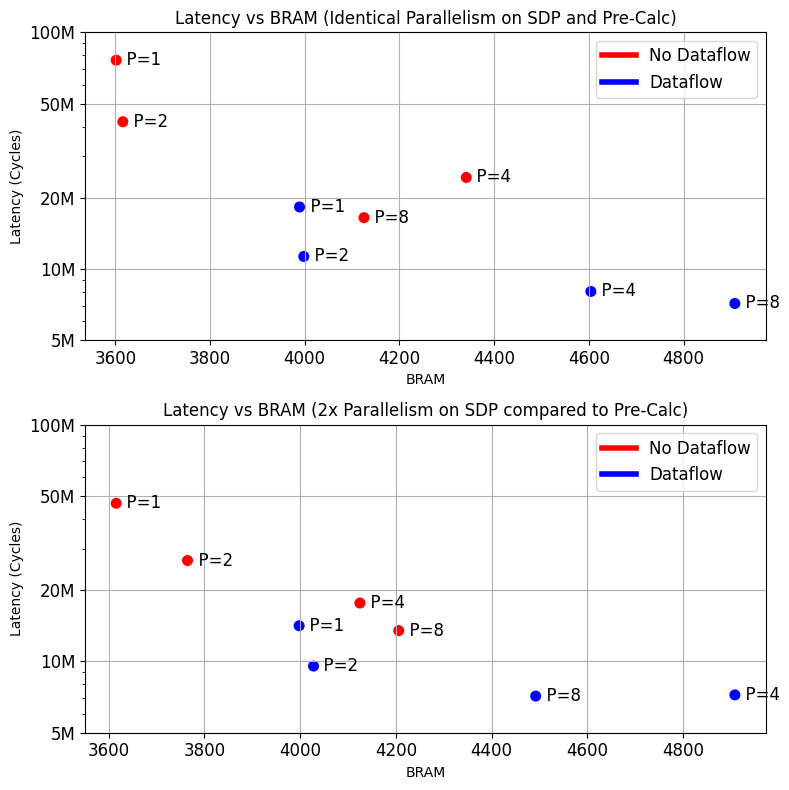

In [134]:
from matplotlib.lines import Line2D
# make 2x1 plot vertically
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

# plot cycles vs bram with labels

for matching_p in [False, True]:
    if matching_p:
        plt.subplot(2, 1, 1)
    else:
        plt.subplot(2, 1, 2)
    # only plot with matching P and P_Suffix
    df_filt = df[(df['P'] == df['P_Suffix']) == matching_p]
    df_filt = df_filt.reset_index(drop=True)

    print(df_filt)

    colors = []
    for i in range(len(df_filt)):
        if df_filt['Dataflow'][i]:
            colors.append('blue')
        else:
            colors.append('red')

    plt.scatter(
        df_filt['BRAM'], 
        df_filt['Latency_Cycles'], 
        color=colors,
        s=48
    )

    # add labels to the scatter points
    for i, txt in enumerate(df_filt['Run_ID']):
        # add a label to the scatter point 
        # but put it above the point
        plt.annotate(
            f"  P={df_filt['P_Suffix'][i]}", 
            (df_filt['BRAM'][i], df_filt['Latency_Cycles'][i]),
            size=12,
            ha='left',
            va='center'
        ) 

    custom_lines = [Line2D([0], [0], color='red', lw=4),
                    Line2D([0], [0], color='blue', lw=4)]


    plt.xlabel('BRAM')
    plt.ylabel('Latency (Cycles)')
    if matching_p:
        plt.title('Latency vs BRAM (Identical Parallelism on SDP and Pre-Calc)')
    else:
        plt.title('Latency vs BRAM (2x Parallelism on SDP compared to Pre-Calc)')

    # make the tickers
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # legend saying red is no dataflow, blue is dataflow
    plt.legend(
        custom_lines,
        ['No Dataflow', 'Dataflow'],
        loc='upper right',
        fontsize=12
    ) 

    # add buffer to xlim and ylim
    plt.ylim(5000000, 90000000)
    plt.yscale('log')

    # make major y ticks more often
    plt.yticks(
        [
            5000000,
            10000000,
            20000000,
            50000000,
            100000000,
        ],
        [
            '5M',
            '10M',
            '20M',
            '50M',
            '100M',
        ]
    )

    # style it

    plt.grid(True)
    plt.tight_layout()

    # make log scale

# save to svg
plt.savefig('latency_vs_bram.svg')

plt.show()


                                        Run_ID  Dataflow   P  P_Suffix  \
0   final_result_dataflow_False_P_2_int8_1.prj     False   2         1   
1   final_result_dataflow_False_P_4_int8_2.prj     False   4         2   
2   final_result_dataflow_False_P_8_int8_4.prj     False   8         4   
3  final_result_dataflow_False_P_16_int8_8.prj     False  16         8   
4    final_result_dataflow_True_P_2_int8_1.prj      True   2         1   
5    final_result_dataflow_True_P_4_int8_2.prj      True   4         2   
6    final_result_dataflow_True_P_8_int8_4.prj      True   8         4   
7   final_result_dataflow_True_P_16_int8_8.prj      True  16         8   

   Latency_Cycles  Clock_Period_ns  Latency_ms  BRAM   DSP      FF     LUT  \
0        46614629            2.707  126.185801  3616   726   80889   68587   
1        26701925            2.494   66.594601  3765  1262  144614  122110   
2        17656421            2.603   45.959664  4125  2712  283516  250381   
3        13497701    

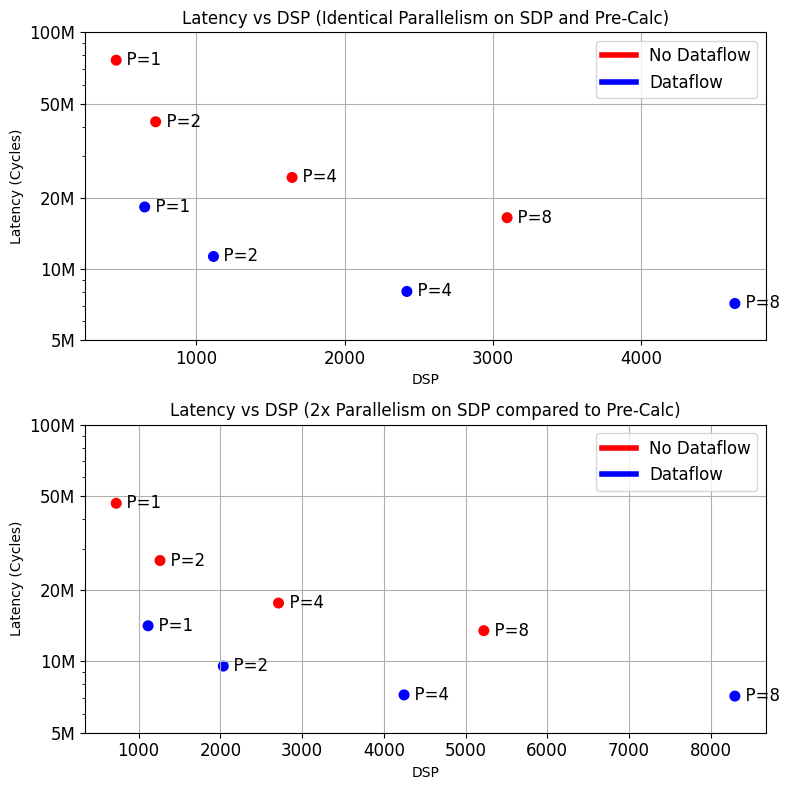

In [132]:
from matplotlib.lines import Line2D
# make 2x1 plot vertically
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

# plot cycles vs bram with labels

for matching_p in [False, True]:
    if matching_p:
        plt.subplot(2, 1, 1)
    else:
        plt.subplot(2, 1, 2)
    # only plot with matching P and P_Suffix
    df_filt = df[(df['P'] == df['P_Suffix']) == matching_p]
    df_filt = df_filt.reset_index(drop=True)

    print(df_filt)

    colors = []
    for i in range(len(df_filt)):
        if df_filt['Dataflow'][i]:
            colors.append('blue')
        else:
            colors.append('red')

    plt.scatter(
        df_filt['DSP'], 
        df_filt['Latency_Cycles'], 
        color=colors,
        s=48
    )

    # add labels to the scatter points
    for i, txt in enumerate(df_filt['Run_ID']):
        # add a label to the scatter point 
        # but put it above the point
        plt.annotate(
            f"  P={df_filt['P_Suffix'][i]}", 
            (df_filt['DSP'][i], df_filt['Latency_Cycles'][i]),
            size=12,
            ha='left',
            va='center'
        ) 

    custom_lines = [Line2D([0], [0], color='red', lw=4),
                    Line2D([0], [0], color='blue', lw=4)]


    plt.xlabel('DSP')
    plt.ylabel('Latency (Cycles)')
    if matching_p:
        plt.title('Latency vs DSP (Identical Parallelism on SDP and Pre-Calc)')
    else:
        plt.title('Latency vs DSP (2x Parallelism on SDP compared to Pre-Calc)')

    # make the tickers
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # legend saying red is no dataflow, blue is dataflow
    plt.legend(
        custom_lines,
        ['No Dataflow', 'Dataflow'],
        loc='upper right',
        fontsize=12
    ) 

    # add buffer to xlim and ylim
    
    plt.ylim(5000000, 90000000)
    plt.yscale('log')

    # make major y ticks more often
    plt.yticks(
        [
            5000000,
            10000000,
            20000000,
            50000000,
            100000000,
        ],
        [
            '5M',
            '10M',
            '20M',
            '50M',
            '100M',
        ]
    )

    # style it

    plt.grid(True)
    plt.tight_layout()

    # make log scale

# save to svg
plt.savefig('latency_vs_dsp.svg')

plt.show()


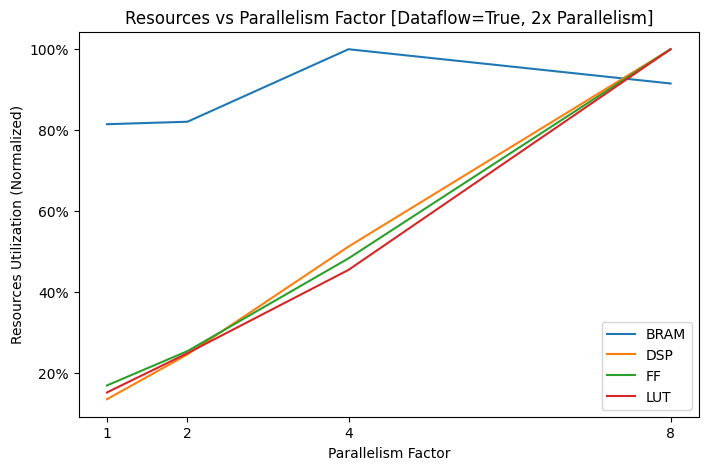

In [159]:
# for 2x parellelism with dataflow, plot BRAM, DSP, FF, LUTs with respect to parallelism factor 

plt.figure(figsize=(8, 5))

df_filt = df[(df['P'] != df['P_Suffix']) & (df['Dataflow'] == True)]
df_filt = df_filt.reset_index(drop=True)


plt.plot(df_filt['P_Suffix'], df_filt['BRAM'] / np.max(df_filt['BRAM']))
plt.plot(df_filt['P_Suffix'], df_filt['DSP'] / np.max(df_filt['DSP']))
plt.plot(df_filt['P_Suffix'], df_filt['FF'] / np.max(df_filt['FF']))
plt.plot(df_filt['P_Suffix'], df_filt['LUT'] / np.max(df_filt['LUT']))

plt.xlabel('Parallelism Factor')
plt.ylabel('Resources Utilization (Normalized)')

# format y label with %
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))

plt.title('Resources vs Parallelism Factor [Dataflow=True, 2x Parallelism]')
plt.legend(['BRAM', 'DSP', 'FF', 'LUT'])
plt.xticks(df_filt['P_Suffix'])

# save as svg 
plt.savefig('relative_resources.svg')


plt.show()  


In [ ]:
# generate a ablation table in typst from the df
print(df.columns)

print("table.header([Dataflow], [P-Factor], [2x SDP P-Factor], [Latency (ms)], [BRAM %], [DSP %]),")
for _, row in df.iterrows():
    print(f"[{row['Dataflow']}], [{row['P']}], [{row['P_Suffix'] != row['P']}], [{row['Latency_ms']:0.2f}], [{row['BRAM_Util']:.2f}%], [{row['DSP_Util']:.2f}%],")

Index(['Run_ID', 'Dataflow', 'P', 'P_Suffix', 'Latency_Cycles',
       'Clock_Period_ns', 'Latency_ms', 'BRAM', 'DSP', 'FF', 'LUT',
       'BRAM_Util', 'DSP_Util'],
      dtype='object')
table.header([Dataflow], [P-Factor], [2x SDP P-Factor], [Latency (ms)], [BRAM %], [DSP %]),
[False], [1], [False], [188.33], [89.34%], [5.10%]
[False], [2], [True], [126.19], [89.68%], [8.05%]
[False], [2], [False], [113.41], [89.68%], [8.05%]
[False], [4], [True], [66.59], [93.38%], [13.98%]
[False], [4], [False], [60.77], [107.66%], [18.24%]
[False], [8], [True], [45.96], [102.31%], [30.05%]
[False], [8], [False], [42.89], [102.31%], [34.31%]
[False], [16], [True], [35.13], [104.32%], [57.89%]
[True], [1], [False], [66.02], [98.93%], [7.23%]
[True], [2], [True], [51.12], [99.16%], [12.37%]
[True], [2], [False], [40.79], [99.16%], [12.37%]
[True], [4], [True], [23.84], [99.90%], [22.56%]
[True], [4], [False], [20.04], [114.19%], [26.82%]
[True], [8], [True], [18.02], [121.73%], [47.07%]
[True], [8], [